**L6.1**

Алгоритмы кластеризации, то есть разбиения точек выборки на пересекающиеся группы по схожести значения признаков, применяются для решения многих практических задач. Самая распространенная их них - это сегментация клиентов. Задача сегментации состоит в том, чтобы выделить среди клиентов организации какие-то заранее не известные группы таким образом, чтобы внутри каждой группы оказались похожие клиенты.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


Для того, чтобы представлять общую форму датасета давайте изобразим его на графике. В датасете четыре значащих признака, но один из них - пол - бинарный, что легко можно изобразить на графике цветом.

<Axes: xlabel='Income', ylabel='Score'>

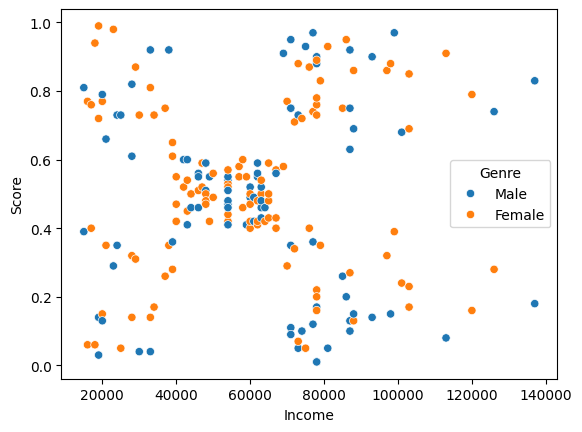

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
X

,Age,Income,Score,Genre_Female,Genre_Male
0,19,15000,0.39,False,True
1,21,15000,0.81,False,True
2,20,16000,0.06,True,False
3,23,16000,0.77,True,False
4,31,17000,0.40,True,False
...,...,...,...,...,...
195,35,120000,0.79,True,False
196,45,126000,0.28,True,False
197,32,126000,0.74,False,True
198,32,137000,0.18,False,True


Кластеризация К-средних

Алгоритм К-средних принимает один обязательный аргумент в своем конструкторе - желаемое количество кластеров. Алгоритм К-средних всегда разбивает выборку на заранее заданное количество. Для начала попробуем три кластера. Про выбор количества кластеров поговорим позднее.

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [ ]:
y_kmeans = k_means.labels_
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

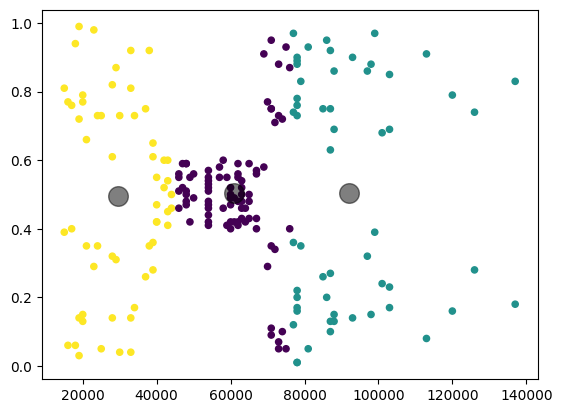

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Очень просто убедиться, что визуализация построена корректно: центры кластеров соответствуют их очертаниям. В данном случае мы, как и задавали, получили три кластера.

Воспользуемся методом локтя для выбора оптимального количества кластеров. Для этого обучим модель с разным количеством, скажем, от 1 до 10, и для каждого количества выведем значение WCSS на графике

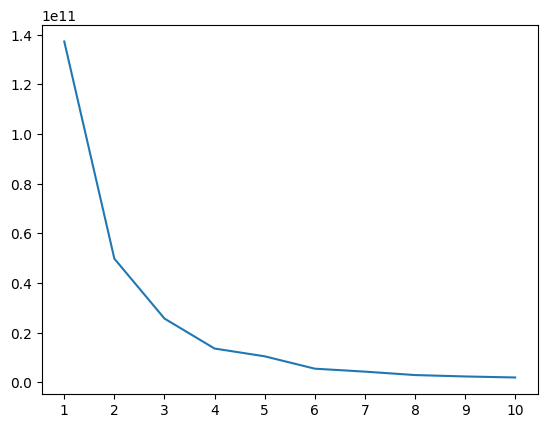

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

Мы видим очень типичную картину: чем больше кластеров, тем меньше значение метрики WSCC. Но в начале она падает очень быстро, а при дальнейшем увеличении количества - начинает все больше выравниваться. Наша задача найти "излом" на этой кривой, то есть такое значение, после которого метрика продолжает падает уже значительно медленнее

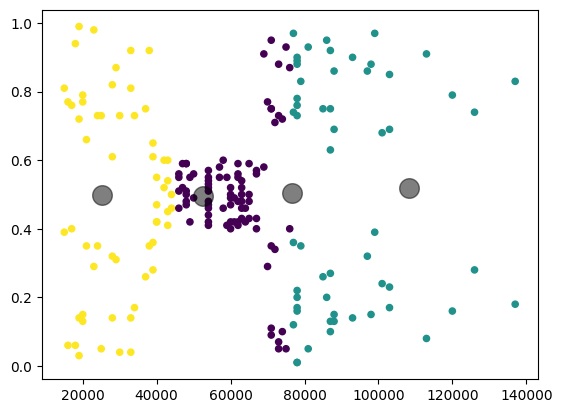

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

"На глаз" разделение данной выборки на 4 части не кажется оптимальным. Даже с учетом того, что мы видим датасет в проекции, кажется что при другом расположении центров кластеры были бы более компактными. Это странное поведение алгоритма. Давайте проверим его еще раз, значительно увеличив количество кластеров

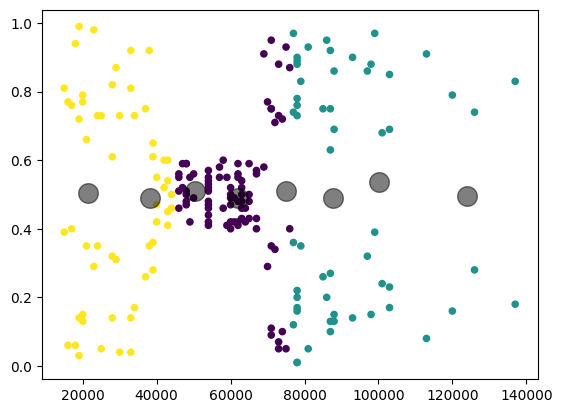

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Центры кластеров подозрительно всегда располагаются вдоль одной оси. И это не кажется оптимальным, когда мы смотрим на общее расположение точек. Если вы видите такое поведение, когда странное поведение выражается вдоль определенной оси, это должно вас навести на мысль о том, что что-то не так с масштабом.

Нормализация признаков

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


<Axes: xlabel='Income', ylabel='Score'>

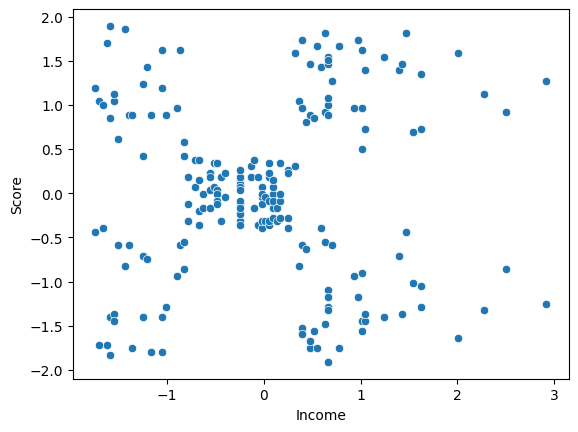

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=X_scaled )

Визуально при построении распределения ничего не поменялось, вся разница видна только в масштабе осей

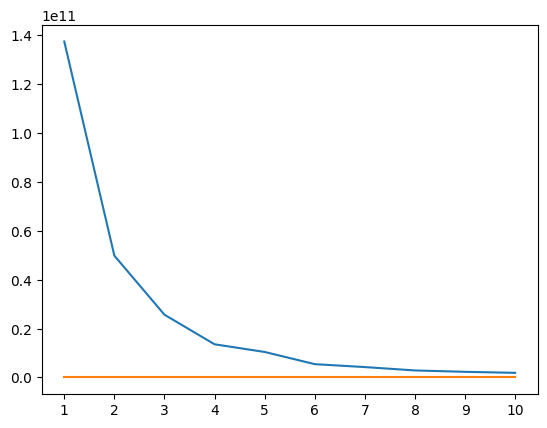

In [ ]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

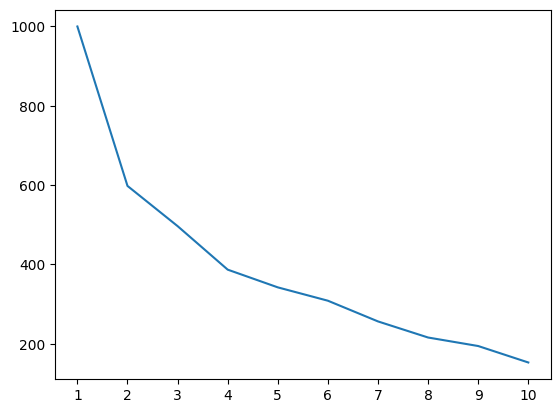

In [ ]:
unscaled, scaled = [], []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

[[ 0.75982983  0.07086791 -0.81492926 -1.12815215  1.12815215]
 [-0.75047453 -0.00501655  0.6979562   0.88640526 -0.88640526]
 [ 0.64256818 -0.09498735 -0.59494042  0.88640526 -0.88640526]
 [-0.76072691  0.05496398  0.83369302 -1.12815215  1.12815215]]


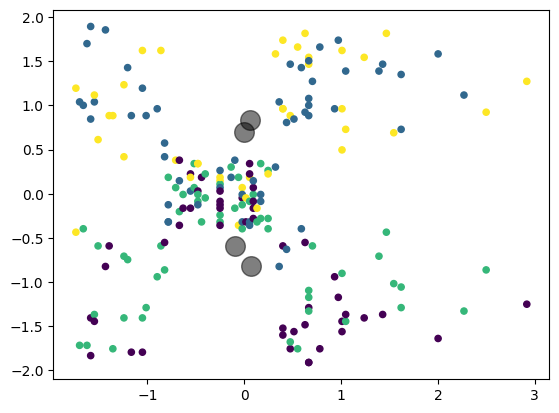

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Главное, что центры кластеров уже не выстраиваются в линию параллельно одному из измерений. Однако, кластеры кажутся перемешанными. Это происходит от того, что мы смотрим на датасет в проекции. Поэтому при решении реальных задач не всегда можно опираться на визуализацию, а ориентироваться нужно в первую очередь на метрики.

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


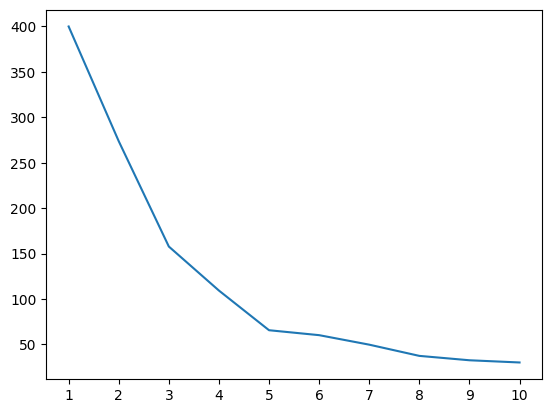

In [ ]:
unscaled, scaled = [], []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

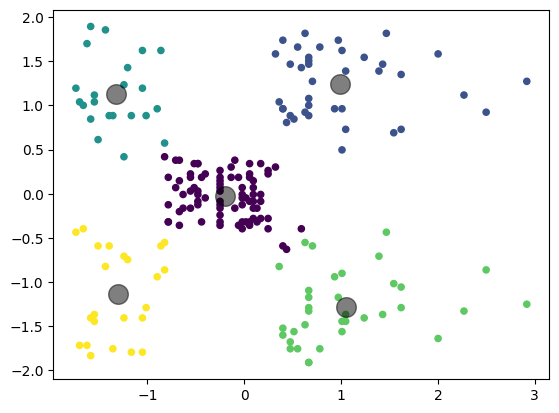

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

Для того, чтобы понять, как работает иерархическая кластеризация, мы построим ее визуализацию в виде дерева. Оно покажет как именно, в каком порядке кластеры объединяются. Такая диаграмма называется дендрограммой. Для построения дендрограммы в эту функцию нужно передать марицу связности в специальном виде. Мы используем готовый сниппет кода, который принимает на вход объект обученной модели агломерационной кластеризации и строит по нему дендрограмму

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

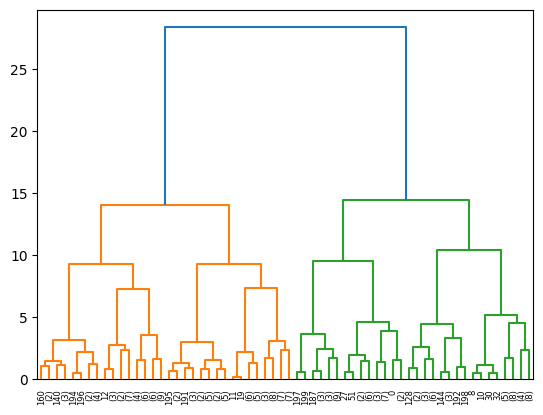

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)

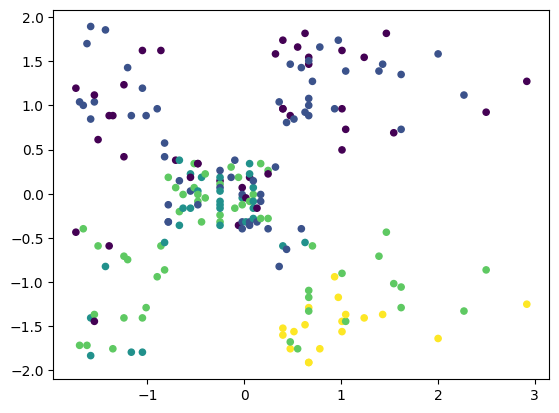

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

Для наглядности, обучим этот алгоритм на плоских данных, чтобы показать визуально, как он объединяет точки на плоскости.

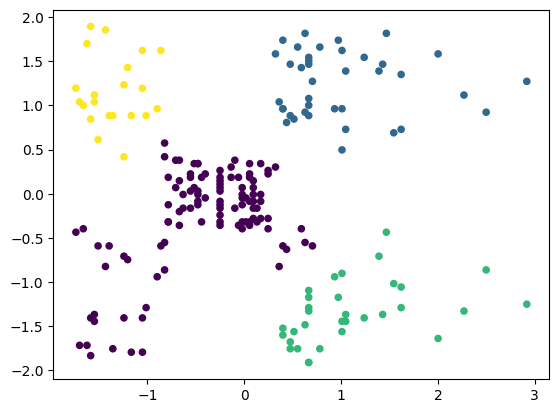

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

DBSCAN

Еще один алгоритм кластеризации, который необходимо разобрать на практике, потому, что он использует совершенно другой подход - DBSCAN. Он оценивает плотность расположения точек в окрестностях заданной.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

У конструктора данного класса два обязательных аргумента: eps - максимальный радиус вокруг точки, попадание в который считается соседством; и min_samples - количество соседних точек, которых достаточно для признания данной точки внутренней. Оба параметра оказывают существенное влияние на результат кластеризации. Они подбираются эмпирически.

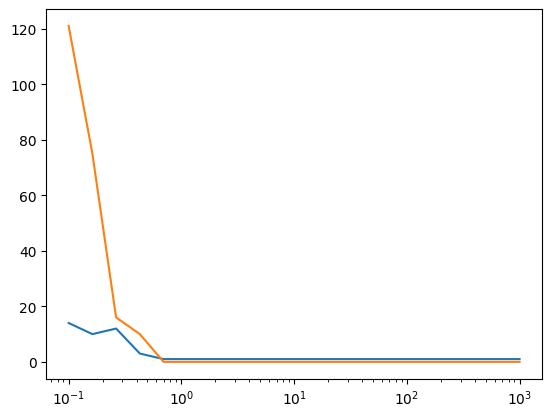

In [ ]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

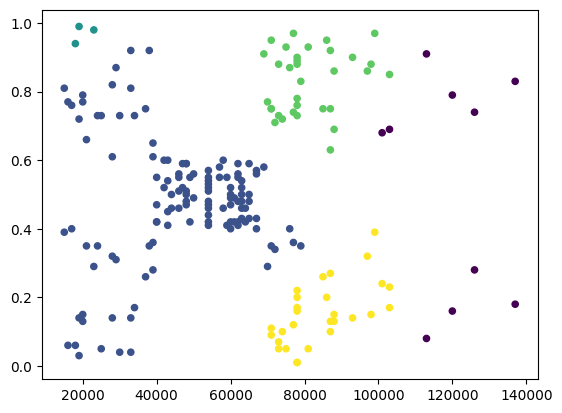

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

**L6.2**

PCA на сгенерированных данных

In [ ]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

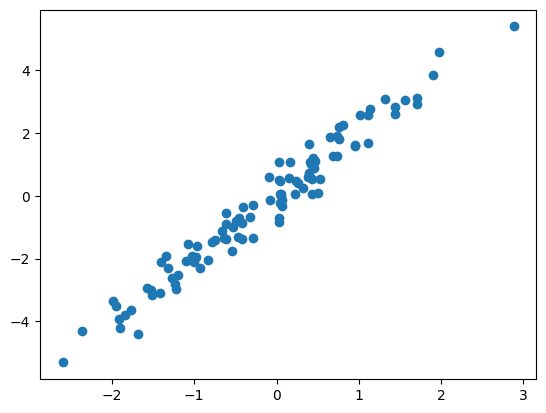

In [ ]:
plt.scatter(x, y)

Попробуем применить метод понижения размерности сразу, на данных как есть. Для этого импортируем класс данного метода из пакета decomposition

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

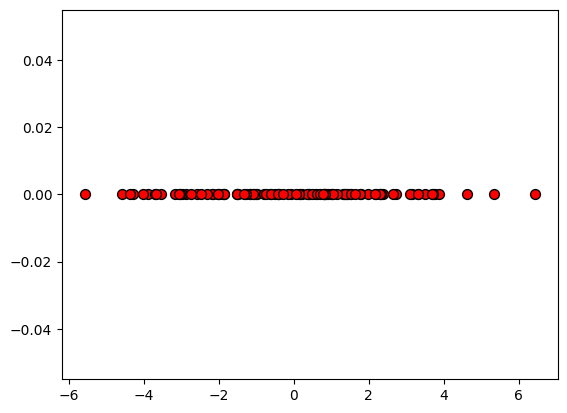

In [ ]:
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

Это распределение, по сути, представляет собой проекцию исходного множества точек на определенную прямую. Эта прямая представляет собой направление, вдоль которого дисперсия исходного распределения максимальна. Этот вектор (направление) как раз и представляет собой главную компоненту.

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.43639631 0.89975455]]
Объясненная дисперсия: [0.99359253]


Первое свойство хранит набор векторов главных компонент. Так как в нашем случае мы оставили только одно измерение, и главная компонента тоже будет одна. Это двумерный вектор, который и представляет собой направление в исходном пространстве.

Второй список хранит доли объясненной дисперсии по главным компонентам. Тут у нас опять только одно значение. Оно значит, что понижение размерности с двух до одного измерения сохраняет 98% исходной дисперсии выборки.

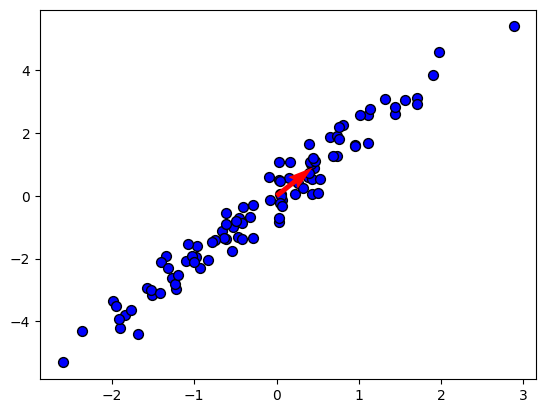

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

Этот код визуализирует вектор, имеющий начало в начале координат и направление, совпадающее с главной компонентой. Так как исходное распределение также проходит через центр графика, получается очень наглядная картина

На практике, данные перед применение метода понижения размерности необходимо нормировать. Посмотрим, как нормировка данных влияет на результат. Воспользуемся уже известным методом стандартизации:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

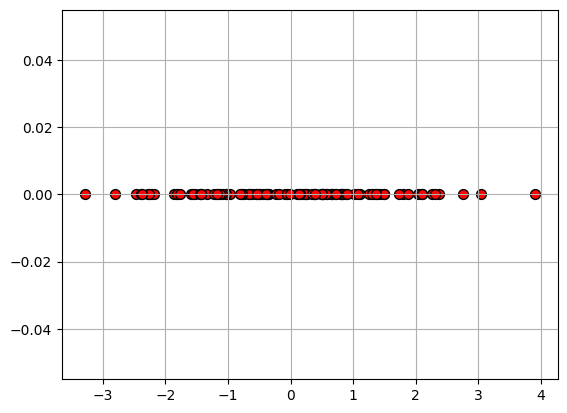

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)
plt.grid(True)

PCA на многомерных данных

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

Теперь применим метод главных компонент. Сейчас выберем уже две главные компоненты. В таком случае результат можно будет визуализировать. Обратите внимание, что мы обязательно применяем нормализацию

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

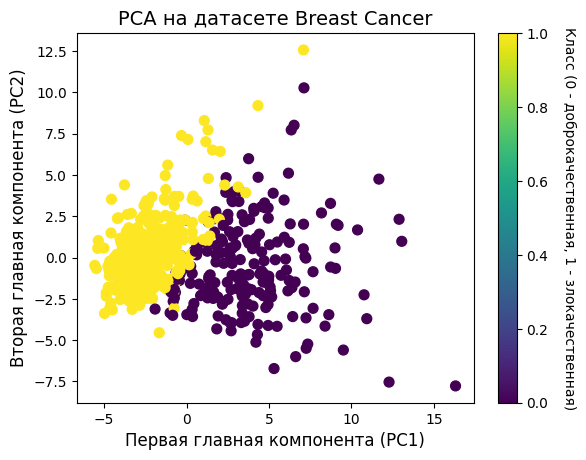

In [ ]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=y, cmap='viridis', s=50)
plt.xlabel('Первая главная компонента (PC1)', fontsize=12)
plt.ylabel('Вторая главная компонента (PC2)', fontsize=12)
plt.title('PCA на датасете Breast Cancer', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 - доброкачественная, 1 - злокачественная)', rotation=270, labelpad=20, fontsize=10)
plt.show()

Метод LDA

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

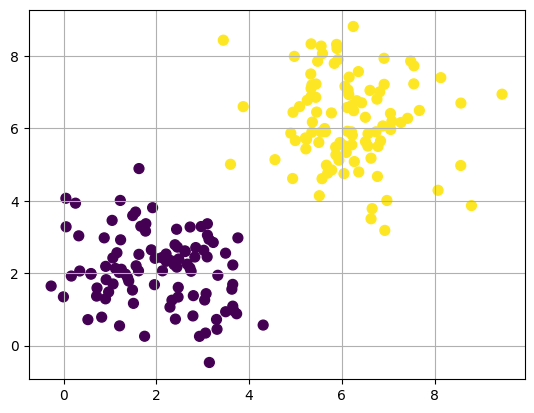

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)

Легко представить себе, что проецируя это распределение вдоль некоторых направлений, изначально очень разделимые классы могут полностью перемешаться. Посмотрим, как этому препятствует метод LDA. Интерфейс у класса этого метода, конечно, точно такой же, как и у предыдущего

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

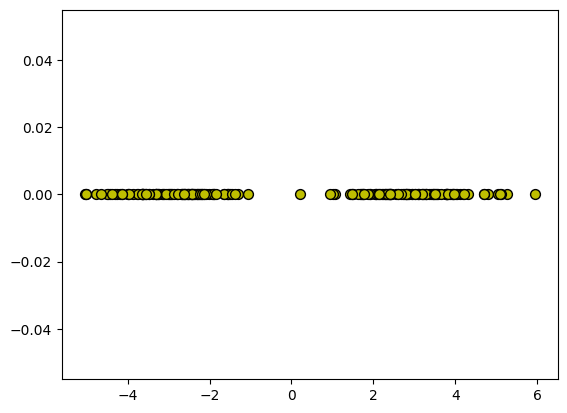

In [ ]:
plt.scatter(X_lda, np.zeros_like(X_lda[:, 0]), c='y', edgecolor='black', s=50)

In [ ]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[10.3141287  9.3743332]]


В данном случае, это свойство содержит один двумерный вектор. Именно его можно использовать для визуализации направления проекции

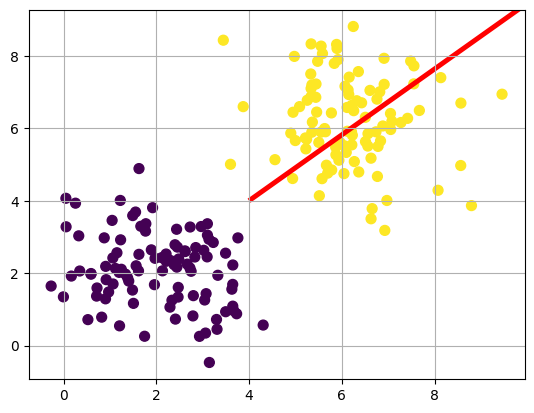

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)
plt.quiver(4, 4, lda.coef_[0][0], lda.coef_[0][1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

Метод LDA для анизатропных классов

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

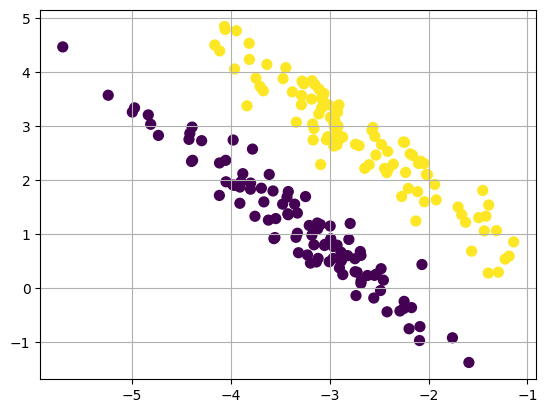

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)

Легко заметить, что направление максимальной дисперсии в данном случае приведет к полному перемешиванию классов в данной выборке. Мы увидим это на практике в сравнении двух методов.

Сперва обучим метод линейного дискриминантного анализа на этих данных. Вот как выглядит результат понижения размерности

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

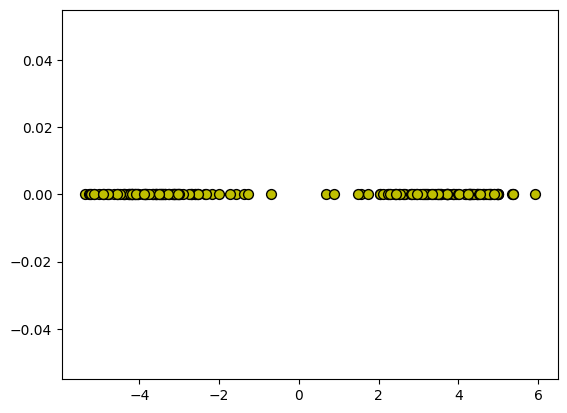

In [ ]:
plt.scatter(X_lda, np.zeros_like(X_lda[:, 0]), c='y', edgecolor='black', s=50)

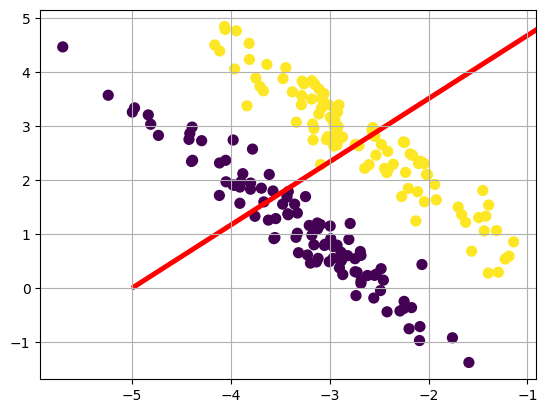

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)
plt.quiver(-5, 0, lda.coef_[0][0], lda.coef_[0][1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

Алгоритм выбрал именно то направление, которое сохраняет разделимость классов. Примечательно то, что метод главных компонент не принимает во внимание значение целевой переменной и, как следствие, приводит к совершенно другой проекции. Вот как выглядит прямая, на которую осуществляется проецирование в методе главных компонент

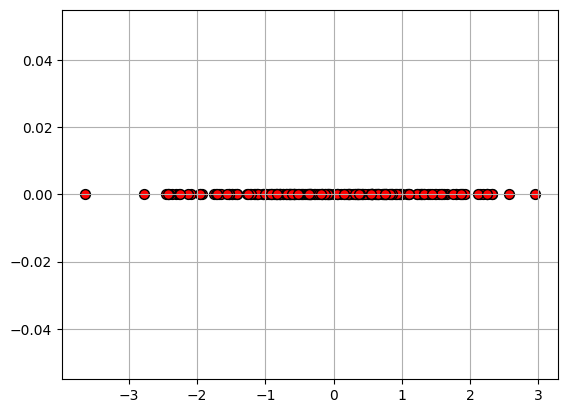

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)
plt.grid(True)

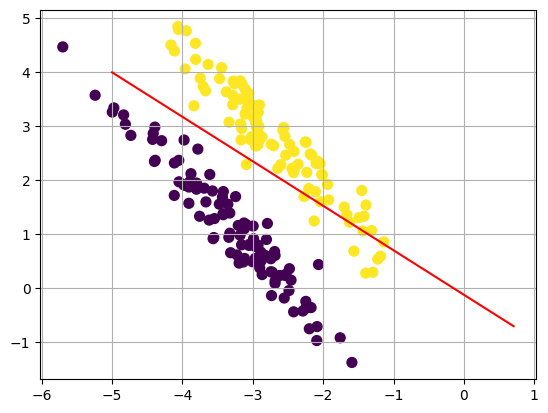

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)
plt.plot([-5, pca.components_[0][0]], [4, pca.components_[0][1]], color='red')

Понижение размерности методом главных компонент, несомненно, сохраняет гарантированно больше информации от исходного распределения. Но если применять его в качестве предварительного этапа обработки данных перед классификацией, то пользы от метода линейного дискриминантного анализа может быть значительно больше.

Метод t-SNE

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

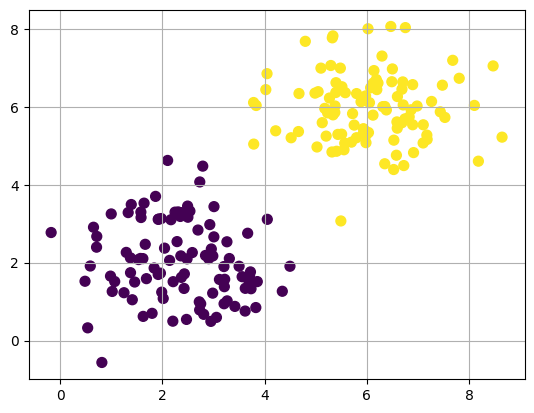

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

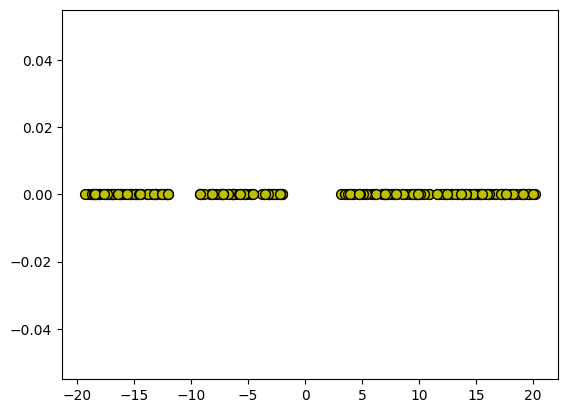

In [ ]:
plt.scatter(X_tsne, np.zeros_like(X_tsne[:, 0]), c='y', edgecolor='black', s=50)

Алгоритм t-SNE является параметрическим. У него есть один главный гиперпараметр, который существенно влияет на работу алгоритма. Это так называемый perplexity - он влиет на то, какие структуры будут превалировать в анализе, крупномасштабные или мелкие. Теоретически очень сложно прочувствовать влияние этого параметр на суть работы алгоритма. Поэтому мы попробуем разные значения на практике. Авторы алгоритма рекомендуют в качестве рабочего диапазона значений этого параметра разброс от 5 до 50. Попробуем несколько конкретных значений из этого диапазона

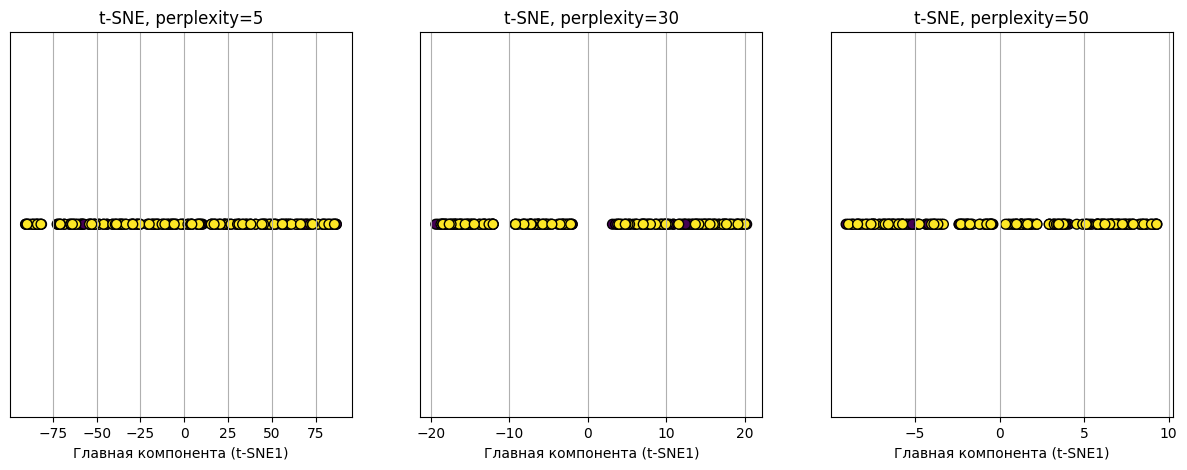

In [ ]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

Kernel PCA для нелинейных данных

Из рассмотренных выше моделей только t-SNE является нелинейным. Два предыдущие методы осуществляют только линейные преобразования исходного пространства. Однако, для некоторых методов возможно применение трюка с ядерными функциями, то есть введение нелинейного преобразования.

Давайте посмотрим датасет с линейно неразделимыми классами

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

Это довольно часто используемый искусственный датасет с ярко выраженной нелинейностью

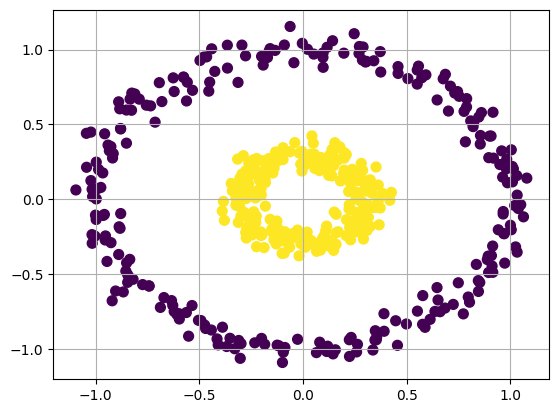

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)

<ipython-input-141-fc73d419a254>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-141-fc73d419a254>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-141-fc73d419a254>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)


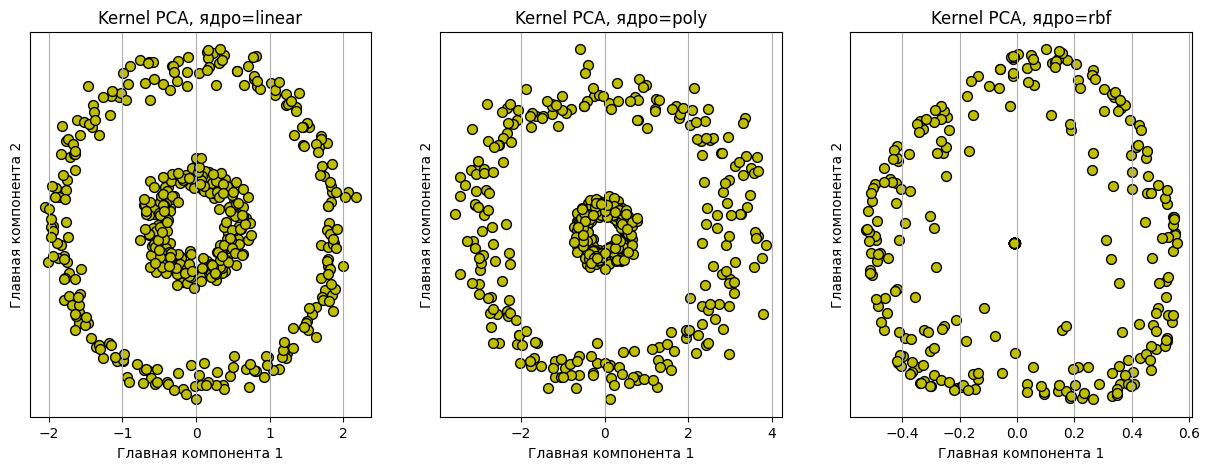

In [ ]:
from sklearn.decomposition import KernelPCA

kernels = ['linear', 'poly', 'rbf']
plt.figure(figsize=(15, 5))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
    plt.title(f'Kernel PCA, ядро={kernel}')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.yticks([])
    plt.grid(True)

Вот так выглядит итоговое преобразование по использованным функциям

Кроме применения разных функций, можно вспомнить, что радиально-базисная ядерная функция параметризуется степенью гамма. Точно также эмпирически можно проверить разные значения этого гиперпараметра

<ipython-input-144-0cd8f082ad12>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-144-0cd8f082ad12>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-144-0cd8f082ad12>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)


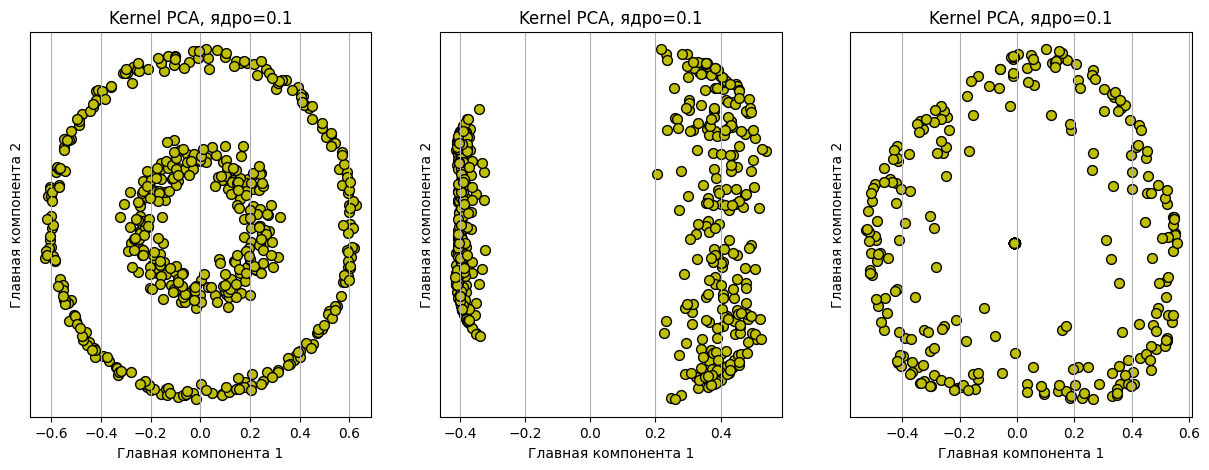

In [ ]:
gamma_values = [0.1, 1, 10]
plt.figure(figsize=(15, 5))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i, gamma in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
    plt.title(f'Kernel PCA, ядро={kernel}')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.yticks([])
    plt.grid(True)